🔥Exploration of RNN model

### Libraries

1. Let's import the usual libraries:

In [2]:
# Data manipulation
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

# Data Visualiation
import matplotlib.pyplot as plt
import seaborn as sns

# System
import os

# Deep Learning
import tensorflow as tf

# (0) The Tennis exploration RNN 


## (0.0) Introduction

🧑🏻‍🏫 **Goals:**
- Prepare a dataset to be fed into a Recurrent Neural Network
- Develop a better understanding of Time Series

❗️ **Warning/Disclaimer**:
- This challenge is truly designed to help you understand **how to deal with temporal data**, using an LSTM architecture as a _tool_, not to focus on the different gates of the LSTM or designing the "best" recurrent network.

🎯 **ML target**:
* In this challenge, we want to **predict the temperature in the next 3, 6, 9, 12... hours**... 
* ...based on a sequence of weather features such as the _past temperature_, the _atmospheric pressure_, the _humidity_, etc..

## (0.1) The Tennis dataset

### (0.1.1) Loading the dataset

👇 Trust us and start from this already preprocessed dataset for this challenge 👇

bigDF.csv are X/Y/Velocity csv file with the Bounce predicted


In [4]:
url = "./data/bigDF.csv"
df = pd.read_csv(url)
print(df.shape)


(3674, 5)


In [5]:
# X = df.drop(labels=["bounce","Unnamed"],axis=1)
X = df[['x','y','V']]
y = df['bounce']

    # print(X.iloc[[i]])
print("image_size : width 640, height 360")
print(X.max())

image_size : width 640, height 360
x    1504.000000
y     957.000000
V    1361.649414
dtype: float64


### (0.0.2) Visualising your Time Series

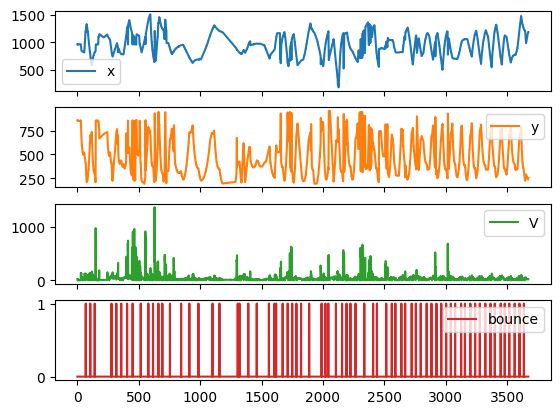

In [6]:
plot_cols = ['x', 'y', 'V', 'bounce']
plot_features = df[plot_cols]
plot_features.index = df.index
plot_features.plot(subplots = True);

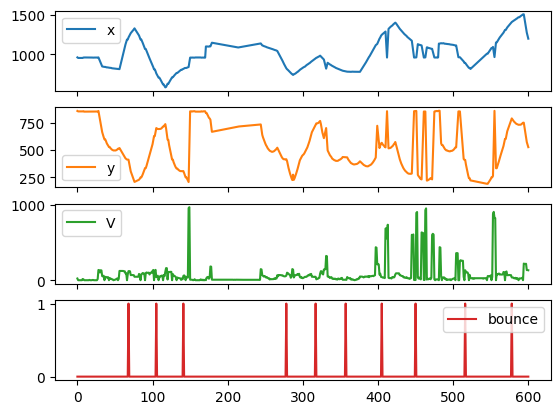

In [7]:
zoomed_slice = slice(0,600)

plot_features = df.loc[zoomed_slice, plot_cols]
plot_features.plot(subplots = True);

# (1) Prepare the dataset

##  (1.0) The big picture

In [8]:
X_pad = np.expand_dims(X, -1)
X_pad.shape

(3674, 3, 1)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, train_size=0.8)

In [10]:
from tensorflow.keras import Sequential, layers

model = Sequential()

model.add(layers.Masking(mask_value=-1., input_shape=(3,1)))

model.add(layers.GRU(units=50, activation='tanh', return_sequences=True))
model.add(layers.GRU(units=40, activation='tanh', return_sequences=False))

model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

2022-11-28 23:01:13.497826: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-28 23:01:13.499820: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-28 23:01:13.500767: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PC-GUITTENY): /proc/driver/nvidia/version does not exist
2022-11-28 23:01:13.509107: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 3, 1)              0         
                                                                 
 gru (GRU)                   (None, 3, 50)             7950      
                                                                 
 gru_1 (GRU)                 (None, 40)                11040     
                                                                 
 dense (Dense)               (None, 50)                2050      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 21,091
Trainable params: 21,091
Non-traina

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=2)

model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

model.fit(X_train, y_train, 
          epochs=75, 
          batch_size=16, 
          verbose=1, 
          callbacks = [es],
          validation_split=0.2)

Epoch 1/75


/home/phguitteny/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


147/147 [==============================] - 9s 21ms/step - loss: 0.1177 - accuracy: 0.9775 - val_loss: 0.0867 - val_accuracy: 0.9830
Epoch 2/75
147/147 [==============================] - 1s 7ms/step - loss: 0.1074 - accuracy: 0.9796 - val_loss: 0.0860 - val_accuracy: 0.9830
Epoch 3/75
147/147 [==============================] - 1s 7ms/step - loss: 0.1048 - accuracy: 0.9796 - val_loss: 0.0862 - val_accuracy: 0.9830
Epoch 4/75
147/147 [==============================] - 1s 7ms/step - loss: 0.1042 - accuracy: 0.9796 - val_loss: 0.0934 - val_accuracy: 0.9830


Baseline model loss: 0.0989 - accuracy: 0.9813

model.evaluate(X_test, y_test) loss: 0.1199 - accuracy: 0.9741

Increasing GRU SIZE : 
loss: 0.1005 - accuracy: 0.9813
model.evaluate(X_test, y_test)loss: 0.1274 - accuracy: 0.9741

In [40]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 5ms/step - loss: 0.1274 - accuracy: 0.9741


[0.1273859590291977, 0.9741496443748474]

In [25]:
occurencies_of_bouncing_train = np.sum(y_train, axis=0)
occurencies_of_bouncing_train

53

In [26]:
occurencies_of_bouncing_test = np.sum(y_test, axis=0)
occurencies_of_bouncing_test

19

In [37]:
y_pred = model.predict(X_test)
y_pred.mean()


23/23 [==============================] - 0s 3ms/step


0.020934219

NEXT : explore LSTM, change Optimizer, play on layers. Using more metrics ( recall, F1 Score to look at false negative)
NEXT : increase the dataset with the data from Taiwan 